In [31]:
import numpy as np

N =10
xscale=10
#noise
mean = 0
stedv = 1
x = np.random.rand(N)*xscale
noise = np.random.normal(loc=mean,scale=stedv,size=N)
y=x*2+5+noise

In [32]:
def dataGen(N=100,xscale=10,mean=0,stedv=1):
    x = np.random.rand(N)*xscale
    noise = np.random.normal(loc=mean,scale=stedv,size=N)
    y=x*2+5+noise
    return(x,y)

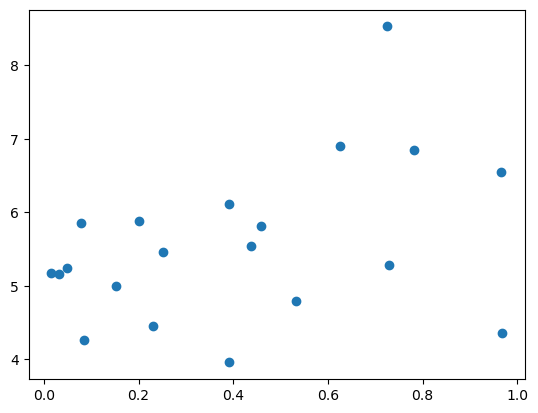

In [33]:
import matplotlib.pyplot as plt

(x,y) = dataGen(20,1)
plt.scatter(x,y)

In [34]:
from sklearn.linear_model import LinearRegression

(x,y) = dataGen(200,1,stedv=0.3)
X=x[:,np.newaxis]
model = LinearRegression()
model.fit(X,y)
print(model.coef_[0],model.intercept_,model.score(X,y))

1.990870713564595 4.994295917789274 0.7851861809196572


## Effect of N on coefficients

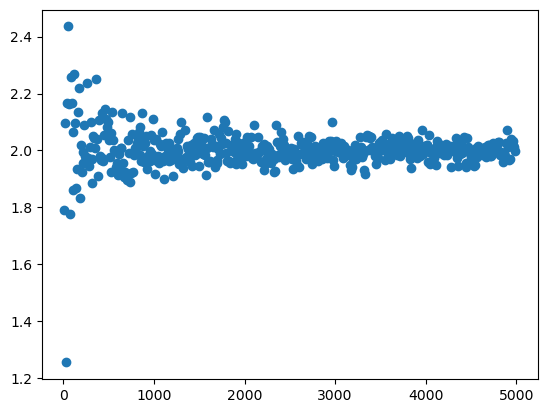

In [35]:
repeats = 5
Ns=np.arange(10,5000,step=10)
coeffs=[]

for N in Ns:
    (x,y) = dataGen(N,1,stedv=0.5)
    X=x[:,np.newaxis]
    coeff = []
    for k in range(repeats):
        model = LinearRegression()
        model.fit(X,y)
        coeff.append(model.coef_)

    coeffs.append(np.mean(coeff))

coeffs=np.array(coeffs)

plt.scatter(Ns,coeffs)
plt.show()

## Effect of noise on coefficients

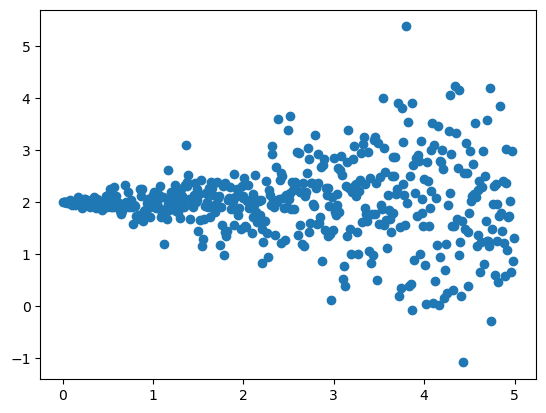

In [36]:
repeats = 5
noises=np.arange(0,5,step=0.01)
coeffs=[]

for noise in noises:
    (x,y) = dataGen(200,1,stedv=noise)
    X=x[:,np.newaxis]
    coeff = []
    for k in range(repeats):
        model = LinearRegression()
        model.fit(X,y)
        coeff.append(model.coef_)

    coeffs.append(np.mean(coeff))

coeffs=np.array(coeffs)

plt.scatter(noises,coeffs)
plt.show()

## Effect of N on R2

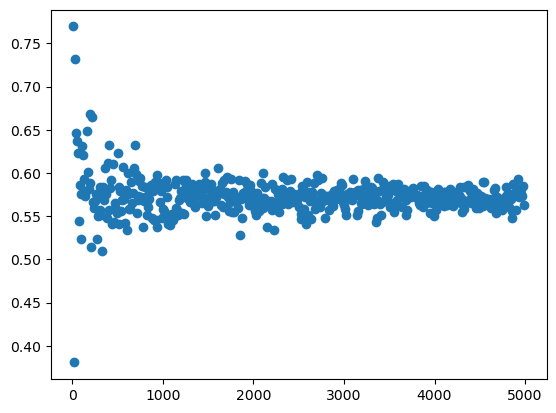

In [37]:
repeats = 5
Ns=np.arange(10,5000,step=10)
scores = []

for N in Ns:
    (x,y) = dataGen(N,1,stedv=0.5)
    X=x[:,np.newaxis]
    score = []
    for k in range(repeats):
        model = LinearRegression()
        model.fit(X,y)
        score.append(model.score(X,y))

    scores.append(np.mean(score))

R2s=np.array(scores)

plt.scatter(Ns,R2s)
plt.show()

## Effect of noise on R2

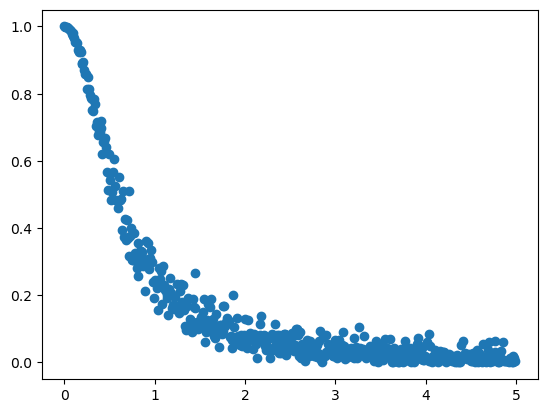

In [38]:
repeats = 5
noises=np.arange(0,5,step=0.01)
scores=[]

for noise in noises:
    (x,y) = dataGen(200,1,stedv=noise)
    X=x[:,np.newaxis]
    score = []
    for k in range(repeats):
        model = LinearRegression()
        model.fit(X,y)
        score.append(model.score(X,y))

    scores.append(np.mean(score))

scores=np.array(scores)

plt.scatter(noises,scores)
plt.show()

# 3 Non-linear function

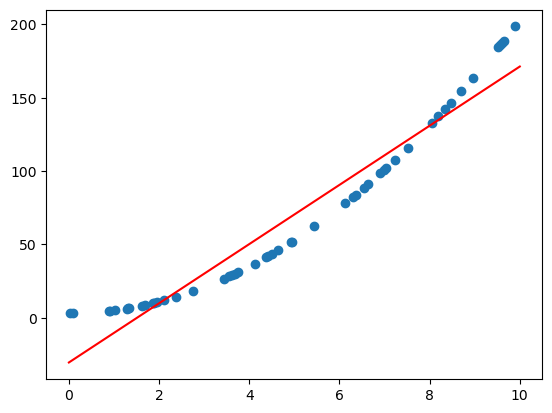

0.9399507299318367


In [57]:
N =50
xscale=10
#noise
mean = 0
stedv = 1
x = np.random.rand(N)*xscale
X = x[:,np.newaxis]
noise = np.random.normal(loc=mean,scale=stedv,size=N)

y = 2*x*x+3

model = LinearRegression()
model.fit(X,y)
b = model.intercept_
m = model.coef_[0]

plt.scatter(X,y)
plt.plot([0,10],[b,m*10+b],color='red')
plt.show()

print(model.score(X,y))

## Random function

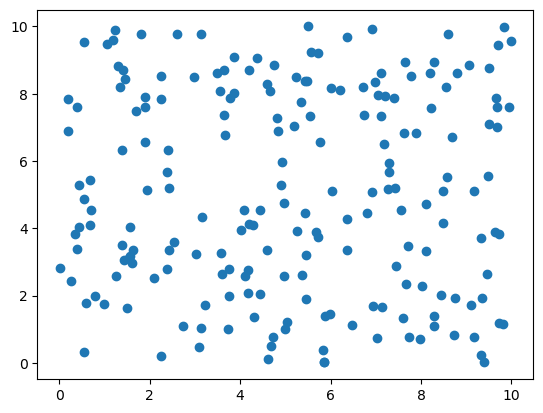

In [58]:
N = 200
xscale = 10
x=np.random.rand(N)*xscale
X=x[:,np.newaxis]
y = np.random.rand(N)*10
plt.scatter(X,y)
plt.show()

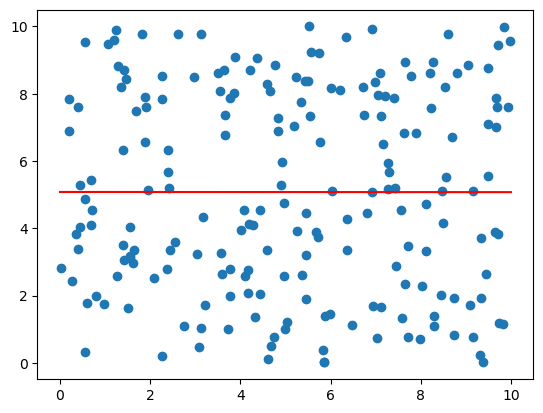

5.080900420539297 -0.0005352356880172089


In [60]:
model = LinearRegression()
model.fit(X,y)

b = model.intercept_
m=model.coef_[0]

plt.scatter(X,y)
plt.plot([0,10],[b,m*10+b],color='red')
plt.show()

print(b,m)

In [61]:
N = 200
xscale = 10
x1=np.random.rand(N)*xscale
x2 = np.arange(1,10,step=0.05)

TypeError: 'int' object is not callable